In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from numpy import where
import itertools 
from matplotlib import rcParams 

In [3]:
# Check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.12.2


In [4]:
train_data = pd.read_csv('final_data.csv', sep=';')
test_data = pd.read_csv('final_data2.csv', sep=';')
train_data.head()

,BadgesNo,AttemptCount,AttemptCount.1,At1,At2,At3,ActivityHistory,ActivityHistory.1,OtherModules,OtherModules.1,...,M10,M13,M15,M16,M19,M21,M22,ModuleSummary,Results,Results.1
0,0,1,Low,0,0,0,0,High,1,High,...,0,0,2,1,0,0,0,5,0,Fail
1,1,2,Medium,6,0,0,1,High,2,High,...,1,0,7,2,1,1,1,20,0,Fail
2,2,1,Low,6,6,43255,3,Low,3,Medium,...,1,1,12,5,1,1,1,33,1,Pass
3,2,1,Low,6,6,37534,3,Low,4,Medium,...,1,1,12,5,1,1,1,33,1,Pass
4,1,3,High,0,0,0,0,High,2,High,...,1,0,7,2,1,1,0,19,0,Fail


In [5]:
X_train = np.asarray(train_data.drop('Results', axis=1))
y_train = np.asarray(train_data['Results'])

In [6]:
X_test = np.asarray(train_data.drop('Results', axis=1))
y_test = np.asarray(train_data['Results'])

In [7]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [8]:
standardizer = StandardScaler()

In [9]:
svclassifier = SVC(probability=True)
svclassifier.fit(X_train, y_train)

SVC(probability=True)

In [10]:
#Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(svclassifier, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.939


In [11]:
# Predictions
yhat = svclassifier.predict(X_test)

In [12]:
# Predictions
yhat_prob = svclassifier.predict_proba(X_test)

In [13]:
# Classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       398
           1       0.90      0.96      0.93       394

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



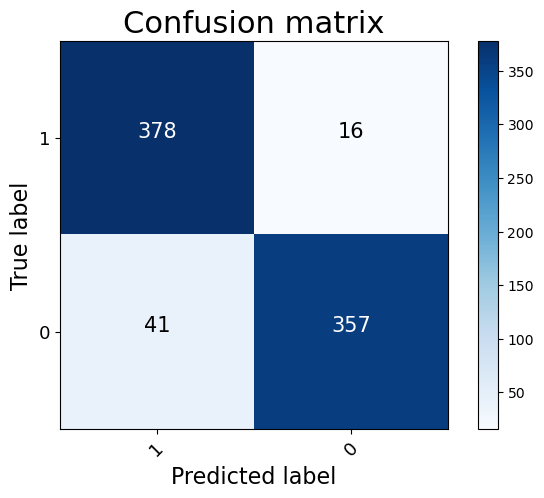

In [16]:
from sklearn.metrics import confusion_matrix 
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)


cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

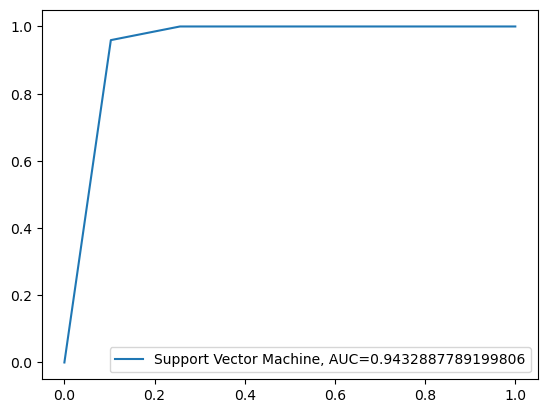

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn import metrics
y_pred_proba = svclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))
plt.legend(loc=4)
plt.show()
plt.savefig('file.jpeg', edgecolor='black', dpi=1500, facecolor='black', transparent=True)